# Exercise 31 - *Regularized Least Squares*

>A colleague has measured a distribution. This distribution becomes part of a Monte Carlo simulation. To be able to work better with this distribution| you look for a suitable parameterization. You know that the distribution can be well described by a sixth-degree polynomial. However, the measurement is very noisy and your colleague was also only able to take eight pairs of values $(x, y)$.

**a) Fit a sixth degree polynomial to the data in the file `ex_a.csv` using the least squares method. State the resulting coefficients and plot the fitted polynomial and data.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, pinv

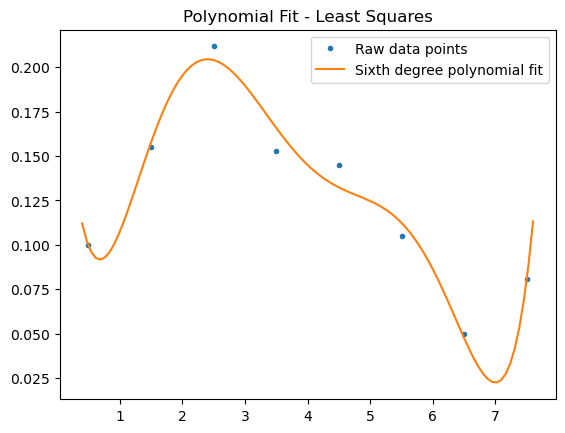

In [2]:
x, y = np.genfromtxt('ex_a.csv', unpack=True, delimiter=',', skip_header=1)

def xn(x,n):
    return x**n


# design matrix
A = []
for i in range(7): A.append(xn(x,i))
A = np.array(A).T

# solution (coefficient) vector for least squares (weight matrix = unit matrix)
a = pinv(A.T@A)@A.T@y

x_ = np.linspace(x[0]-0.1, x[-1]+0.1, 100)
plt.plot(x,y, '.')
plt.plot(x_, np.polyval(np.flip(a), x_))    # coefficient vector in reverse order for polyval-function
plt.legend(["Raw data points","Sixth degree polynomial fit"])
plt.title("Polynomial Fit - Least Squares")
plt.show()

**Solution:** The coefficients are

|$p_0$|$p_1$|$p_2$|$p_3$|$p_4$|$p_5$|$p_6$|
|-|-|-|-|-|-|-|
|3.55e-04 |-8.41e-03|7.69e-02|-3.37e-01|7.03e-01 |-5.78e-01|2.50e-01|

**b) Fit a sixth degree polynomial to the data in the file `ex_a.csv` using the least squares method and additionally use the regularization via the second derivative $(\Gamma=\sqrt{\lambda} C A)$. For the regularization strength use $\lambda \in(0.1,0.3,0.7,3,10)$. State the resulting coefficients and plot the fitted polynomial and the data.**

We use $C=\left(\begin{array}{ccccc}
-1 & 1 & 0 & 0 & \cdots \\
1 & -2 & 1 & 0 & \cdots \\
0 & 1 & -2 & 1 & \cdots \\
\cdots & \cdots & 1 & -2 & 1 \\
\ldots & \cdots & \cdots & 1 & -1
\end{array}\right)$ .

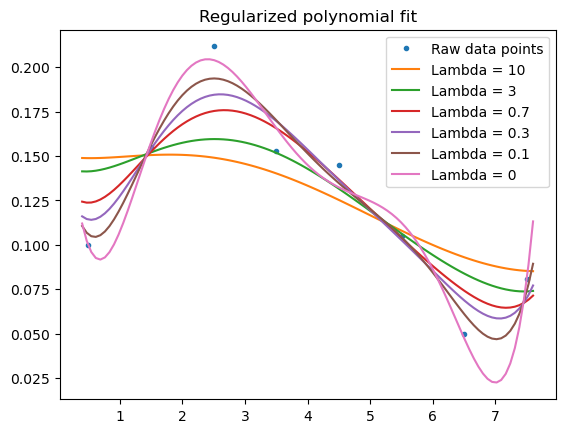

In [3]:
lam = [.1,.3,.7,3,10]
C = np.matrix([[-1,1,0,0,0,0,0,0],[1,-2,1,0,0,0,0,0],[0,1,-2,1,0,0,0,0],
               [0,0,1,-2,1,0,0,0],[0,0,0,1,-2,1,0,0],[0,0,0,0,1,-2,1,0]
             ,[0,0,0,0,0,1,-2,1],[0,0,0,0,0,0,1,-1]],dtype = "float64")

def reg(l):
    return inv(A.T@A + l*(C@A).T@(C@A))@A.T@y

a_reg = []
for i in range(len(lam)):
    a_reg.append(reg(lam[i]))
    
    
plt.plot(x,y, '.')
for i in range(len(lam)): plt.plot(x_, np.polyval(np.flip(a_reg)[i][0],x_))  # a_reg is a matrix in a list, which results in tedious index management
plt.plot(x_, np.polyval(np.flip(a), x_))
plt.legend(["Raw data points", "Lambda = 10", "Lambda = 3", "Lambda = 0.7", "Lambda = 0.3", "Lambda = 0.1", "Lambda = 0"])
plt.title("Regularized polynomial fit")
plt.show()
    
    

In [4]:
print(a_reg)

[matrix([[ 1.77051516e-01, -2.90333213e-01,  3.75360675e-01,
         -1.77608015e-01,  3.94217777e-02, -4.20777821e-03,
          1.74225695e-04]]), matrix([[ 1.50746121e-01, -1.58077312e-01,  2.14314526e-01,
         -9.84996477e-02,  2.09125853e-02, -2.14507244e-03,
          8.61849490e-05]]), matrix([[ 1.42748957e-01, -8.72516595e-02,  1.22823253e-01,
         -5.43579871e-02,  1.09108334e-02, -1.06390109e-03,
          4.11723873e-05]]), matrix([[ 1.46435271e-01, -2.53253819e-02,  3.71732498e-02,
         -1.54747235e-02,  2.73169706e-03, -2.34332199e-04,
          8.27195513e-06]]), matrix([[ 1.50592612e-01, -8.00760585e-03,  1.09496192e-02,
         -4.81350343e-03,  7.81637373e-04, -5.87060020e-05,
          1.85143060e-06]])]


Table with regularized coefficients

| |$a_0$|$a_1$|$a_2$|$a_3$|$a_4$|$a_5$|$a_6$|
|:-|-----|-----|-----|-----|-----|-----|-----|
|$\lambda = 0.1$|1.77e-01| -2.90e-01|  3.75e-01|-1.77e-01|  3.94e-02| -4.20e-03| 1.74e-04|
|$\lambda = 0.3$|1.50e-01| -1.58e-01|  2.14e-01|-9.84e-02|  2.09e-02| -2.14e-03| 8.61e-05|
|$\lambda = 0.7$|1.42e-01| -8.72e-02|  1.22e-01|-5.43e-02|  1.09e-02| -1.06e-03| 4.11e-05|
|$\lambda = 3$  |1.46e-01| -2.53e-02|  3.71e-02|-1.54e-02|  2.73e-03| -2.34e-04| 8.27e-06|
|$\lambda = 10$ |1.50e-01| -8.00e-03|  1.09e-02|-4.81e-03|  7.81e-04| -5.87e-05| 1.85e-06|

>Your colleague makes the effort to produce 50 new measurements of the spectrum.

**(c) Fit a sixth degree polynomial to the mean values of the data from the file ex_c.csv using the least squares method. Weight the calculated means with the uncertainty of the mean. Use these weights when fitting. Plot the fitted polynomial and the averaged data.**

In [5]:
data = np.genfromtxt('ex_c.csv', unpack=True, delimiter=',', skip_header=1)
x = data[0]
y = data[1:]
y = y.T  #the index now corresponds to the respective y_i

y_m = np.mean(y, axis=1)
y_s = np.std(y, axis=1)

We introduce the weight matrix $\mathbf{W}[\mathbf{y}]=\operatorname{Var}[\mathbf{y}]^{-1}=\left(\begin{array}{cccc}
\frac{1}{\sigma_0^2} & 0 & \cdots & 0 \\
0 & \frac{1}{\sigma_1^2} & \ddots & \vdots \\
\vdots & \ddots & \ddots & 0 \\
0 & \cdots & 0 & \frac{1}{\sigma_n^2}
\end{array}\right)$

to get the general solution of the weighted least squares $\hat{\boldsymbol{a}}=\left(\boldsymbol{A}^{\top} \boldsymbol{W} \boldsymbol{A}\right)^{-1} \boldsymbol{A}^{\top} \boldsymbol{W} \boldsymbol{y}$.

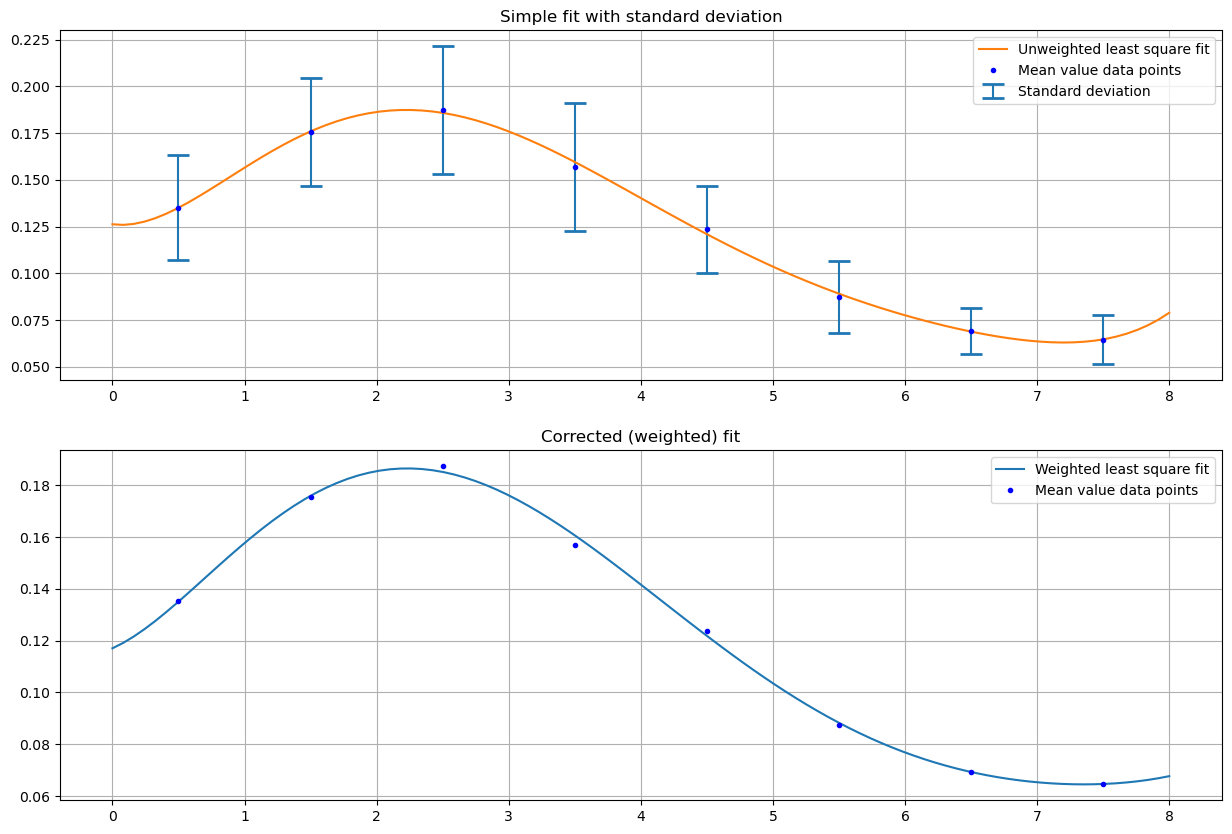

In [6]:
W = np.diag(1/(y_s)**2)

# new design matrix
A = []
for i in range(7): A.append(xn(x,i))
A = np.array(A).T

# general (weighted) solution (coefficient vector)
a = pinv(A.T@W@A)@A.T@W@y_m

# for comparison: least squares without weights
p = np.polyfit(x, y_m, 6)

x_ = np.linspace(0,8,100)

fig, ax = plt.subplots(2, figsize=(15,10))
ax[0].grid()
ax[0].errorbar(x, y_m, yerr=y_s, capsize=8, lw=0, elinewidth=1.5, capthick=2)
ax[0].plot(x_, np.polyval(p, x_))     # least squares without weights
ax[0].plot(x, y_m, 'b.')
ax[0].legend(["Unweighted least square fit","Mean value data points", "Standard deviation"])
ax[0].set_title("Simple fit with standard deviation")

ax[1].grid()
ax[1].plot(x_, np.polyval(np.flip(a), x_))
ax[1].plot(x, y_m, 'b.')
ax[1].set_title("Corrected (weighted) fit")
ax[1].legend(["Weighted least square fit","Mean value data points"])
plt.show()

>Error bars represent the *(square-rooted)* reciprocal magnitude of the weights.

The two graphs are very similar. For comparison we calculate the absolute and relative deviation.

**Absolute:**
$\Delta y(x) = y_u(x) - y_w(x) =: y_{abs}(x)$ with 
- $y_u:$ *unweighted least squares* and 
- $y_w:$ *weighted least squares*.

**Relative:**
$\Delta \bar{y}(x) = \frac{y_u(x) - y_w(x)}{y_u(x)} =: y_{rel}(x)$

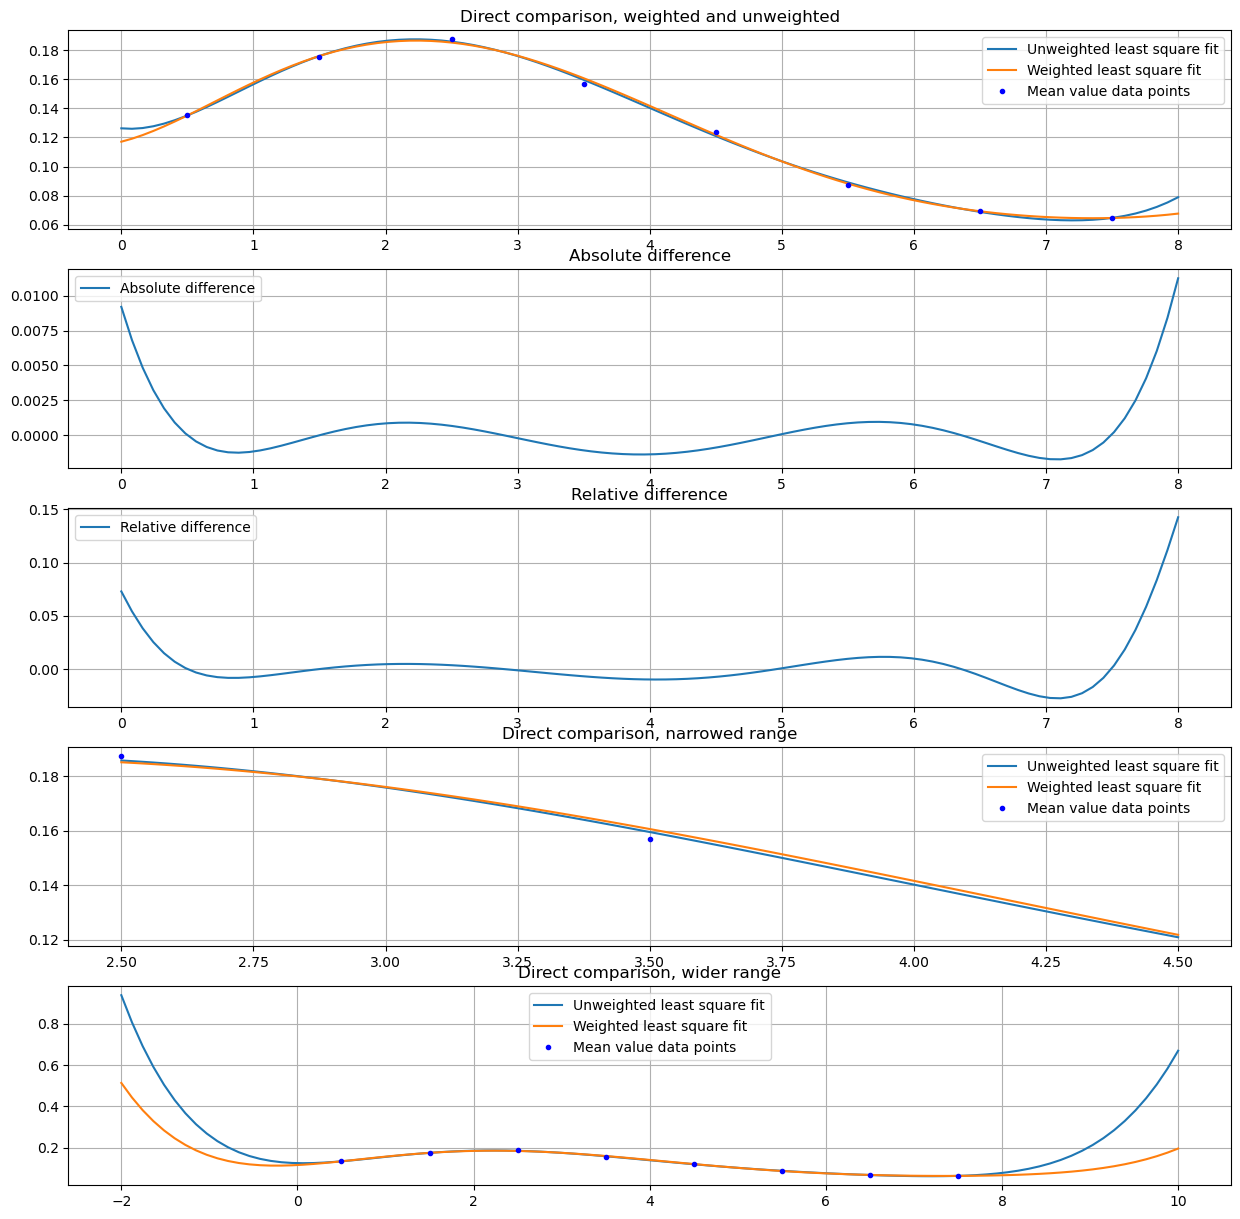

In [7]:
fig, ax = plt.subplots(5, figsize=(15,15))
ax[0].plot(x_, np.polyval(p, x_))     # least squares without weights
ax[0].plot(x_, np.polyval(np.flip(a), x_))
ax[0].plot(x, y_m, 'b.')
ax[0].legend(["Unweighted least square fit", "Weighted least square fit","Mean value data points"])
ax[0].set_title("Direct comparison, weighted and unweighted")
ax[0].grid()

ax[1].plot(x_, np.polyval(p, x_)-np.polyval(np.flip(a), x_))
ax[1].legend(["Absolute difference"])
ax[1].set_title("Absolute difference")
ax[1].grid()

ax[2].plot(x_, (np.polyval(p, x_)-np.polyval(np.flip(a), x_))/np.polyval(p, x_))
ax[2].legend(["Relative difference"])
ax[2].set_title("Relative difference")
ax[2].grid()

x_s = np.linspace(2.5,4.5,100)
ax[3].plot(x_s, np.polyval(p, x_s))     # least squares without weights
ax[3].plot(x_s, np.polyval(np.flip(a), x_s))
ax[3].plot(x[2:4], y_m[2:4], 'b.')
ax[3].legend(["Unweighted least square fit", "Weighted least square fit","Mean value data points"])
ax[3].set_title("Direct comparison, narrowed range")
ax[3].grid()

x__ = np.linspace(-2,10,100)
ax[4].plot(x__, np.polyval(p, x__))     # least squares without weights
ax[4].plot(x__, np.polyval(np.flip(a), x__))
ax[4].plot(x, y_m, 'b.')
ax[4].legend(["Unweighted least square fit", "Weighted least square fit","Mean value data points"])
ax[4].set_title("Direct comparison, wider range")
ax[4].grid()
plt.show()

In the range of the data points, the relative deviation of the two polynomial fits (weighted and unweighted least squares) is not greater than $2.5\%$.

For a wider range of $x$-values we notice a dampened divergence towards infinity.

It is also noticeable that the *weighted least squares*-method doesn't necessarily guarantee a fit that is closer to the data points. It is rather smoothed out like the methods used previously. 